In [0]:
"""
This block builds class for making predictions on test set based on trained parameters

"""

class Network_test():
  
  def __init__(self, layer_dims, X_test, labels_test, parameters_train):
   
    self.X = X_test
    
    self.labels = labels_test
    
    self.L = len(layer_dims)
    
    self.parameters = parameters_train
    
    self.AL = 0
    
    self.Y = []
    
    self.m = 0
    
    self.caches = {}
    
    self.cost= 0
    
    self.p = []
    
  def vectorize_label(self):
    #Y=np.zeros((10,1))
    #Y[labels] =1.0
    #return Y
    """
    labels -- tru labels, array, e.g. [1,3,4]

    """
    y_enc = (np.arange(np.max(self.labels) + 1) == self.labels[:, None]).astype(float)

    self.Y = y_enc.T

    self.m = self.Y.shape[1]
    
  def linear_activation_forward(self, A_prev, W, b, activation):
    """
    Arguments:
    A_prev -- previous A result from layer l-1, shape of (layer_dims[l-1], m)
    W -- weight for layer l shape of (layer_dims[l], layer_dims[l-1])
    b -- bias for layer l shape of (layer_dims[l], 1)
    activation -- relu/softmax

    Returns:
    A -- 
    cache -- 
    """

    #Z, linear_cache = linear_forward(A_prev, W, b)

    Z = self.linear_forward(A_prev, W, b)

    if activation == "relu":
      #A, activation_cache = relu(Z)
      A = self.relu(Z)
    if activation == "softmax":
      #A, activation_cache = softmax(Z)
      A = self.softmax(Z)

    #cache = (linear_cache, activation_cache)
    return A  
      
    
  def linear_forward(self, A, W, b):
    """
    Arguments:
    A -- activation result from layer l-1, shape of (layer_dims[l-1], m)
    W -- weight for layer l shape of (layer_dims[l], layer_dims[l-1])
    b -- bias for layer l shape of (layer_dims[l], 1)

    Returns:
    Z -- linear result shape of (layer_dims[l], m)
    cache -- A,W,b 
    """


    #Z=np.dot(W,A) + b

    Z = W.dot(A) +b

    assert(Z.shape == (W.shape[0], A.shape[1]) )
    #cache = (A, W, b)

    return Z
    
    
  def relu(self, Z):

    """
    Arguments:
    Z -- output of linear layer, with shape(n,m), n is number of units

    Returns:
    A -- relu result of Z
    cache -- 
    """

    A=np.maximum(0,Z)

    assert(A.shape == Z.shape)

    #cache = Z
    return A 
    
    
  def softmax(self, Z):
    '''
    implements softmax funciton

    Arguments:
    Z -- input as an array of shape(n,1)

    Returns:
    A -- softmax result of array z, same shape as z
    cache -- A. 
    '''
    A=np.exp(Z)/np.sum(np.exp(Z),axis=0)
    #cache=Z
    assert(A.shape == Z.shape)
    return A  

  def L_model_forward(self):
    """
    Arguments:
    X -- input data. shape of 
    parameters -- output from initialize_parameters_deep. dictionary contains:
                  Wl -- weight shape of (layer_dims[l], layer_dims[l-1])
                  bl -- bias shape of (layer_dims[l],1)

    Returns:
    AL -- final output of shape (layer_dims[l], m)
    """

    assert(self.X.shape[0] == self.parameters['W1'].shape[1])

    self.caches["A0"] = self.X

    for l in np.arange(1,self.L-1):


      self.caches["Z"+str(l)] = self.linear_forward(self.caches["A"+str(l-1)], self.parameters['W'+str(l)], self.parameters['b'+str(l)])

      self.caches["A"+str(l)] = self.relu(self.caches["Z"+str(l)] )

    l+=1

    self.caches["Z"+str(l)] = self.linear_forward(self.caches["A"+str(l-1)], self.parameters['W'+str(l)], self.parameters['b'+str(l)])

    self.caches["A"+str(l)] = self.softmax(self.caches["Z"+str(l)])


    self.AL = self.caches["A"+str(self.L-1)]    
    
  
  def predict_test(self):
    """
    This function is used to predict the results of a  L-layer neural network.

    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model

    Returns:
    p -- predictions for the given dataset X
    """
    
    self.vectorize_label()
    
    self.L_model_forward()

    self.p=self.AL.argmax(axis=0)


    print("Accuracy: "  + str(np.sum((self.p == self.labels)/self.m)))

    #self.accuracy = np.sum((self.p == self.labels)/self.m)
    #return self.p
  

In [0]:
"""
This block builds class for implementing MLN - for now, it has no dropout, SGD with momentom. only basic naive model.
"""

class Network():
  
  def __init__(self, layer_dims, X, labels):
    """
    Arguments: layer_dims -- python array containing dimensions of each layer. e.g. np.array[2,5,10]
                          -- input layer = no. of attributes; hidden layer; output layer = no. of classes
               Y -- true vectorized labels, shape (10,m)
               
               caches -- dictionary containing Z for l in (1,L+1),A for l in (0,L+1), Al - activation result for layer l, Zl - linear result for layer l
                      -- with A for layer L being AL, A0=X
    """
    self.X = X
    
    self.labels = labels
    
    self.layer_dims = layer_dims
    
    self.L = len(layer_dims)
    
    self.parameters = {}
    
    self.AL = 0
    
    self.Y = []
    
    self.m = 0
    
    self.grads = {}
    
    self.caches = {}
    
    self.cost=0
    
    self.p = []
    
  def vectorize_label(self):
      #Y=np.zeros((10,1))
      #Y[labels] =1.0
      #return Y
      """
      labels -- tru labels, array, e.g. [1,3,4]

      """
      y_enc = (np.arange(np.max(self.labels) + 1) == self.labels[:, None]).astype(float)
      
      self.Y = y_enc.T
      
      self.m = self.Y.shape[1]
      
    
  def linear_activation_forward(self, A_prev, W, b, activation):
      """
      Arguments:
      A_prev -- previous A result from layer l-1, shape of (layer_dims[l-1], m)
      W -- weight for layer l shape of (layer_dims[l], layer_dims[l-1])
      b -- bias for layer l shape of (layer_dims[l], 1)
      activation -- relu/softmax

      Returns:
      A -- 
      cache -- 
      """

      #Z, linear_cache = linear_forward(A_prev, W, b)
      
      Z = self.linear_forward(A_prev, W, b)

      if activation == "relu":
        #A, activation_cache = relu(Z)
        A = self.relu(Z)
      if activation == "softmax":
        #A, activation_cache = softmax(Z)
        A = self.softmax(Z)

      #cache = (linear_cache, activation_cache)
      return A  
    
  def initialize_parameters_deep(self):
      """
      Arguments:
      layer_dims -- python array containing dimensions of each layer

      Returns:
      parameters -- dictionary
                    Wl -- weight shape of (layer_dims[l], layer_dims[l-1])
                    bl -- bias shape of (layer_dims[l],1)

      """
      np.random.seed(1)
      #self.parameters = {}

      for l in range(1,self.L):
        self.parameters['W'+str(l)] = np.random.rand(self.layer_dims[l], self.layer_dims[l-1]) / np.sqrt(self.layer_dims[l-1]) *0.001
        self.parameters['b'+str(l)] = np.zeros((self.layer_dims[l],1))

        assert(self.parameters['W'+str(l)].shape == (self.layer_dims[l], self.layer_dims[l-1]))
        assert(self.parameters['b'+str(l)].shape == (self.layer_dims[l], 1))

    
  def linear_forward(self, A, W, b):
      """
      Arguments:
      A -- activation result from layer l-1, shape of (layer_dims[l-1], m)
      W -- weight for layer l shape of (layer_dims[l], layer_dims[l-1])
      b -- bias for layer l shape of (layer_dims[l], 1)

      Returns:
      Z -- linear result shape of (layer_dims[l], m)
      cache -- A,W,b 
      """


      #Z=np.dot(W,A) + b

      Z = W.dot(A) +b

      assert(Z.shape == (W.shape[0], A.shape[1]) )
      #cache = (A, W, b)

      return Z
    
    
  def relu(self, Z):
  
      """
      Arguments:
      Z -- output of linear layer, with shape(n,m), n is number of units

      Returns:
      A -- relu result of Z
      cache -- 
      """

      A=np.maximum(0,Z)

      assert(A.shape == Z.shape)

      #cache = Z
      return A 
    
    
  def softmax(self, Z):
      '''
      implements softmax funciton

      Arguments:
      Z -- input as an array of shape(n,1)

      Returns:
      A -- softmax result of array z, same shape as z
      cache -- A. 
      '''
      A=np.exp(Z)/np.sum(np.exp(Z),axis=0)
      #cache=Z
      assert(A.shape == Z.shape)
      return A
    


    
  def L_model_forward(self):
      """
      Arguments:
      X -- input data. shape of 
      parameters -- output from initialize_parameters_deep. dictionary contains:
                    Wl -- weight shape of (layer_dims[l], layer_dims[l-1])
                    bl -- bias shape of (layer_dims[l],1)

      Returns:
      AL -- final output of shape (layer_dims[l], m)
      """

      assert(self.X.shape[0] == self.parameters['W1'].shape[1])
      
      self.caches["A0"] = self.X

      for l in np.arange(1,self.L-1):

        
        self.caches["Z"+str(l)] = self.linear_forward(self.caches["A"+str(l-1)], self.parameters['W'+str(l)], self.parameters['b'+str(l)])
        
        self.caches["A"+str(l)] = self.relu(self.caches["Z"+str(l)] )

      l+=1
      
      self.caches["Z"+str(l)] = self.linear_forward(self.caches["A"+str(l-1)], self.parameters['W'+str(l)], self.parameters['b'+str(l)])
      
      self.caches["A"+str(l)] = self.softmax(self.caches["Z"+str(l)])

     
      self.AL = self.caches["A"+str(self.L-1)]

      
  def cross_entropy(self):
      """
      Calculate cross entropy

      Arguments:
      AL -- output of model:probability vector, shape (10, m)
      Y -- true label vector, shape of (10,m)

      Returns:
      cost -- cross entropy cost

      """

      assert (self.AL.shape == self.Y.shape)
      self.cost = -np.sum(np.log(self.AL)*self.Y)/self.m

      self.cost =np.squeeze(self.cost)
      #assert (cost.shape == ())
      #return cost
    
    
  def relu_backward(self, dA, Z):
      """
      Implement the backward propagation for a single RELU unit.

      Arguments:
      dA -- post-activation gradient, of any shape
      cache -- 'Z' where we store for computing backward propagation efficiently

      Returns:
      dZ -- Gradient of the cost with respect to Z
      """

      #Z = cache
      dZ = np.array(dA, copy=True) # just converting dz to a correct object.

      # When z <= 0, you should set dz to 0 as well. 
      dZ[Z <= 0] = 0

      assert (dZ.shape == Z.shape)

      return dZ
    
  
  def softmax_backward(self, Z):
      """
      Z -- linear output Z in current layer l 

      """

      dZ = self.softmax(Z)-self.Y
      
      return dZ
    
    
  def linear_backward(self, dZ, A_prev, W, b):
      """
      Implement the linear portion of backward propagation for a single layer (layer l)

      Arguments:
      dZ -- Gradient of the cost with respect to the linear output (of current layer l)
      cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
      A_prev -- activation result from layer l-1, 

      Returns:
      dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
      dW -- Gradient of the cost with respect to W (current layer l), same shape as W
      db -- Gradient of the cost with respect to b (current layer l), same shape as b
      """
      #A_prev, W, b = cache
      #m = A_prev.shape[1]

      dW = 1./self.m * np.dot(dZ,A_prev.T)
      db = 1./self.m * np.sum(dZ, axis = 1, keepdims = True)
      dA_prev = np.dot(W.T,dZ)

      assert (dA_prev.shape == A_prev.shape)
      assert (dW.shape == W.shape)
      assert (db.shape == b.shape)

      return dA_prev, dW, db
    
    
  def L_model_backward(self):
      """
      Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group

      Arguments:
      AL -- probability vector, output of the forward propagation (L_model_forward())
      Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
      caches -- list of caches containing:
                  every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                  the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)

      Returns:
      grads -- A dictionary with the gradients
               grads["dA" + str(l)] = ... 
               grads["dW" + str(l)] = ...
               grads["db" + str(l)] = ... 
      """


      #Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

      # Initializing the backpropagation
      
      dAL = - np.divide(self.Y, self.AL) 
               
      self.grads["dA"+str(self.L-1)] = dAL

      # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
      
      #current_cache = caches[L-1]

               
      self.grads["dZ"+str(self.L-1)] = self.softmax_backward(self.caches["Z"+str(self.L-1)])
               
                              
      self.grads["dA"+str(self.L-2)], self.grads["dW"+str(self.L-1)], self.grads["db"+str(self.L-1)] = self.linear_backward(self.grads["dZ"+str(self.L-1)], self.caches["A"+str(self.L-2)], self.parameters["W"+str(self.L-1)], self.parameters["b"+str(self.L-1)])
               

      for l in reversed(np.arange(1,self.L-1)):
          # lth layer: (RELU -> LINEAR) gradients.
          #current_cache = caches[l]
                                                                               
          self.grads["dZ"+str(l)] = self.relu_backward(self.grads["dA"+str(l)], self.caches["Z"+str(l)])
                                                                               
          self.grads["dA"+str(l-1)], self.grads["dW"+str(l)], self.grads["db"+str(l)] = self.linear_backward(self.grads["dZ"+str(l)], self.caches["A"+str(l-1)], self.parameters["W"+str(l)], self.parameters["b"+str(l)])
                                                                       
                                                                               
  def update_parameters(self, learning_rate):
      """
      Update parameters using gradient descent

      Arguments:
      parameters -- python dictionary containing your parameters 
      grads -- python dictionary containing your gradients, output of L_model_backward

      Returns:
      parameters -- python dictionary containing your updated parameters 
                    parameters["W" + str(l)] = ... 
                    parameters["b" + str(l)] = ...
      """

      #L = len(parameters) // 2 # number of layers in the neural network
      
      

      # Update rule for each parameter. Use a for loop.
      for l in range(self.L-1):
          self.parameters["W" + str(l+1)] = self.parameters["W" + str(l+1)] - learning_rate * self.grads["dW" + str(l+1)]
          self.parameters["b" + str(l+1)] = self.parameters["b" + str(l+1)] - learning_rate * self.grads["db" + str(l+1)]
   




  def predict(self):
      """
      This function is used to predict the results of a  L-layer neural network.

      Arguments:
      X -- data set of examples you would like to label
      parameters -- parameters of the trained model

      Returns:
      p -- predictions for the given dataset X
      """

      self.p=self.AL.argmax(axis=0)


      print("Accuracy: "  + str(np.sum((self.p == self.labels)/self.m)))
      
      #self.accuracy = np.sum((self.p == self.labels)/self.m)
      #return self.p
    
    
  def L_layer_model(self, learning_rate = 0.0075, num_iterations = 1000, print_cost=False):
      
      np.random.seed(1)
      
      costs = []
      
      accuracys = []
      
      self.vectorize_label()
      
      self.initialize_parameters_deep()
      
      
      for i in range(0, num_iterations):  
        
          self.L_model_forward()
          
          self.cross_entropy()
          
          self.L_model_backward()
          
          self.update_parameters(learning_rate)
          
          # Print the cost every 100 training example
          if print_cost and i % 100 == 0:      
            
            
            print ("Cost after iteration %i: %f" %(i, self.cost))
            
            #accuracy = self.predict().accuracy
            #print (accuracy)
            
          if print_cost and i % 100 == 0:

            costs.append(self.cost)
            
            #accuracys.append(accuracy)
            
          if print_cost and i % 1000== 0: 
            
            self.predict()
      
      self.predict()  
      # plot the cost
      plt.plot(np.squeeze(costs))
      #plt.plot(np.squeeze(accuracys))
      plt.ylabel('cost')
      plt.xlabel('iterations (per tens)')
      plt.title("Learning rate =" + str(learning_rate))
      plt.show()


    
    

In [247]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test_128.h5 to test_128.h5
User uploaded file "test_128.h5" with length 10242144 bytes


In [57]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train_128.h5 to train_128.h5
Saving train_label.h5 to train_label.h5
User uploaded file "train_128.h5" with length 61442144 bytes
User uploaded file "train_label.h5" with length 482144 bytes


128
The first 10 instances:  4 

Cost after iteration 0: 2.302588
Accuracy: 0.0148
Cost after iteration 100: 0.464055
Cost after iteration 200: 0.392994
Cost after iteration 300: 0.379635
Cost after iteration 400: 0.340426
Cost after iteration 500: 0.340386
Cost after iteration 600: 0.329774
Cost after iteration 700: 0.309313
Cost after iteration 800: 0.287539
Cost after iteration 900: 0.286898
Cost after iteration 1000: 0.301120
Accuracy: 0.8856500000000003
Cost after iteration 1100: 0.254043
Cost after iteration 1200: 0.247297
Cost after iteration 1300: 0.243899
Cost after iteration 1400: 0.233112
Accuracy: 0.9121500000000005


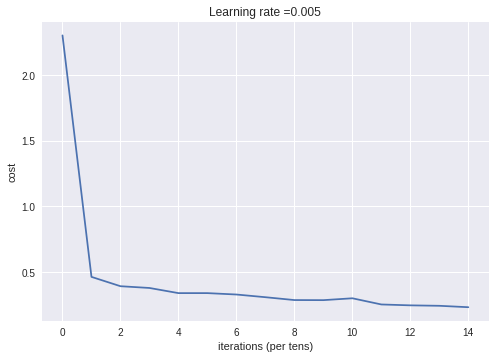

--- 164.25924348831177 seconds ---


In [258]:
"""
Load in train set data and run the model
"""
with h5py.File('train_128.h5','r') as H:
    X = np.copy(H['data']).T
print(len(data[0,:]))
with h5py.File('train_label.h5','r') as H:
    labels = np.copy(H['label'])
print("The first 10 instances: ",label[22],"\n")

X_train = X[:,0:20000]
labels_train = labels[0:20000]

start_time = time.time()


layer_dims = np.array([128,50,10])

case_train = Network(layer_dims,X_train, labels_train)

case_train.L_layer_model(learning_rate= 0.005, num_iterations=1500, print_cost=True)

print("--- %s seconds ---" % (time.time() - start_time))

In [260]:
"""
Test the parameters generated using a subset of train data
"""

X_30000 = X[:,20000:30001]
labels_30000 = labels[20000:30001]

parameters_train = case_train.parameters
case_test_2 = Network_test(case_train.layer_dims, X_30000, labels_30000, parameters_train)
case_test_2.predict_test()

Accuracy: 0.8641135886411357


In [262]:

X_40000 = X[:,30000:40001]
labels_40000 = labels[30000:40001]

parameters_train = case_train.parameters
case_test_1 = Network_test(case_train.layer_dims, X_40000, labels_40000, parameters_train)
case_test_1.predict_test()

Accuracy: 0.8674132586741324


In [261]:

X_20000 = X[:,10000:20001]
labels_20000 = labels[10000:20001]

parameters_train = case_train.parameters
case_test_1 = Network_test(case_train.layer_dims, X_20000, labels_20000, parameters_train)
case_test_1.predict_test()

Accuracy: 0.9072092790720926


In [0]:
"""
Load in test data 
"""
with h5py.File('test_128.h5','r') as H_test:
    X_test = np.copy(H_test['data']).T

Cost after iteration 0: 2.302585
Accuracy: 0.095
Cost after iteration 100: 2.300247
Cost after iteration 200: 2.299924
Cost after iteration 300: 2.299878
Cost after iteration 400: 2.299869
Cost after iteration 500: 2.299864
Cost after iteration 600: 2.299856
Cost after iteration 700: 2.299841
Cost after iteration 800: 2.299809
Cost after iteration 900: 2.299742
Cost after iteration 1000: 2.299606
Accuracy: 0.11100000000000002
Cost after iteration 1100: 2.299327
Cost after iteration 1200: 2.298765
Cost after iteration 1300: 2.297659
Cost after iteration 1400: 2.295571
Cost after iteration 1500: 2.291889
Cost after iteration 1600: 2.285937
Cost after iteration 1700: 2.277302
Cost after iteration 1800: 2.266147
Cost after iteration 1900: 2.253482
Cost after iteration 2000: 2.240218
Accuracy: 0.171
Cost after iteration 2100: 2.226202
Cost after iteration 2200: 2.210053
Cost after iteration 2300: 2.189679
Cost after iteration 2400: 2.163092
Cost after iteration 2500: 2.130517
Cost after ite

Cost after iteration 7100: 0.098954
Cost after iteration 7200: 0.093046
Cost after iteration 7300: 0.087566
Cost after iteration 7400: 0.082782
Cost after iteration 7500: 0.078199
Cost after iteration 7600: 0.074189
Cost after iteration 7700: 0.070463
Cost after iteration 7800: 0.067014
Cost after iteration 7900: 0.063831
Cost after iteration 8000: 0.060862
Accuracy: 1.0000000000000004
Cost after iteration 8100: 0.058250
Cost after iteration 8200: 0.055746
Cost after iteration 8300: 0.053412
Cost after iteration 8400: 0.051234
Cost after iteration 8500: 0.049219
Cost after iteration 8600: 0.047331
Cost after iteration 8700: 0.045546
Cost after iteration 8800: 0.043916
Cost after iteration 8900: 0.042338
Cost after iteration 9000: 0.040874
Accuracy: 1.0000000000000004
Cost after iteration 9100: 0.039487
Cost after iteration 9200: 0.038175
Cost after iteration 9300: 0.036990
Cost after iteration 9400: 0.035821
Cost after iteration 9500: 0.034751
Cost after iteration 9600: 0.033698
Cost a

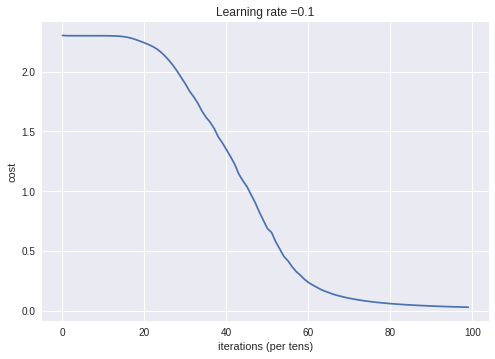

--- 51.83878207206726 seconds ---


In [227]:
# test a own-generated data set using the model
import numpy as np
import matplotlib.pyplot as plt
import time
start_time = time.time()

case1_layer_dims = np.array([128,50,10])
case1_X=np.random.rand(128,1000)
case1_labels= np.random.randint(10,size=1000)


case1 = Network(case1_layer_dims , case1_X, case1_labels)

case1.L_layer_model(learning_rate = 0.1, num_iterations=10000, print_cost=True)

print("--- %s seconds ---" % (time.time() - start_time))

In [0]:
case1_X_test = np.random.rand(128,1000)
case1_labels_test= np.random.randint(10,size=1000)
parameters_train = case1.parameters
case1_test = Network_test(case1_layer_dims, case1_X_test, case1_labels_test, parameters_train)
case1_test.predict_test()

In [0]:
#back test case
A_prev = X
W = case1.parameters['W1']
b = case1.parameters['b1']
dZ=np.random.rand(3,2)

m = A_prev.shape[1]

dW = 1./m * np.dot(dZ,A_prev.T)
db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
dA_prev = np.dot(W.T,dZ)

assert (dA_prev.shape == A_prev.shape)
assert (dW.shape == W.shape)
assert (db.shape == b.shape)

In [88]:
#softmax back test

Z_prev=np.random.rand(10,2)

dZ = np.exp(Z_prev)/np.sum(np.exp(Z_prev),axis=0)-Y

dZ

array([[ 0.08667124,  0.10417552],
       [ 0.17286902,  0.10163095],
       [ 0.06679216,  0.12914691],
       [-0.91724266,  0.12998553],
       [ 0.09662129,  0.13753244],
       [ 0.13838783,  0.10114531],
       [ 0.07514305,  0.06157375],
       [ 0.07401605,  0.06063485],
       [ 0.07299804,  0.07267717],
       [ 0.13374399, -0.89850242]])